## **Market Basket Analysis**

### **Data Collection**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Market Basket Data - Online_Retail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4211,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31/10/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


'''
SKU --> Stock Keeping Unit (distinct products)

Note: qty of SKUs doesn't matter when analyzing the market basket data.
      Our primary goal is to analyze the buying pattern of the customer.
'''

### **Data Transformation**

In [ ]:
data['InvoiceNo'].nunique()

25900

In [ ]:
data['CustomerID'].nunique()

4372

In [ ]:
data['InvoiceDate'].min(), data['InvoiceDate'].max()

('01/02/11 10:00', '31/10/11 9:58')

Within the span of 9 months we had 4372 distinct customers with 25900 distinct purchases.

As we saw in the data description, quantity column has some -ve values which
doesn't make any sense. Let's drop all the records having -ve quantities in them.

In [ ]:
data.loc[data['Quantity']<=0].sort_values(by='Quantity',ascending=True)['Quantity'].count()

10624

In [ ]:
data = data[data['Quantity']>0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [ ]:
# Even where there is missing data in columns like customer number or invoice number,
# we can drop those records directly.

data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [ ]:
data['Country'].value_counts()

Country
United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


As we can see, we have data for multiple countries. We will be working on any one of the countries
Country = United Kingdom

Along with this we will be creating a Sparse Matrix of the data.

Sparse Matrix is a matrix which will help us in finding the products which user bought and if not the then will be represented as 0.

In [ ]:
sparse_data = data[data['Country']=='United Kingdom'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
sparse_data.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After converting the data into sparse matrix, instead of values its showing sum of quantities along with the invoice. We need to replace that such that if the sum is greater than 0 then 1 else 0. Because this will be easy for us to interpret and get our work done.

In [ ]:
def sparse_convert(x):
  if x <= 0:
    return 0
  if x > 0:
    return 1

sparse_data = sparse_data.applymap(sparse_convert)
sparse_data.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# removing the rows where total items bought are less than 2.
sparse_data = sparse_data[sparse_data.sum(axis=1) > 1]

In [ ]:
sparse_data.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, as we can see we have around 4000 unique items. It will be a very tideous job to analyze all at once due to time complexity.

So, we will use an algorithm called 'Apriori Algorithm' which works on a concept of 'Threshold Support'.

Threshold Support --> It finds the frequency of each unique pair of items in the data and if the frequency is below the threshold then it will not consider that pair of items for further analysis.

Note: Threshold is a hyper param and denoted in the terms of percentage of total data.

### **Implementation of Market Basket Analysis**

#### **Apriori Algorithm**

In [ ]:
from mlxtend.frequent_patterns import apriori

apriori_data = apriori(sparse_data, min_support=0.03,
                       use_colnames=True).sort_values('support', ascending=True).reset_index(drop=True)

apriori_data

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.030111,(SET 2 TEA TOWELS I LOVE LONDON)
1,0.030171,"(LUNCH BAG SUKI DESIGN, LUNCH BAG BLACK SKULL.)"
2,0.030292,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG RED RETR..."
3,0.030413,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.)"
4,0.030473,(CREAM HEART CARD HOLDER)
...,...,...
173,0.084165,(LUNCH BAG RED RETROSPOT)
174,0.095471,(PARTY BUNTING)
175,0.100671,(REGENCY CAKESTAND 3 TIER)
176,0.116331,(JUMBO BAG RED RETROSPOT)


In [ ]:
# Let's also add a new column which will show the total items we have in each items set.

apriori_data['total_items'] = apriori_data['itemsets'].apply(lambda x: len(x))
apriori_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,total_items
0,0.030111,(SET 2 TEA TOWELS I LOVE LONDON),1
1,0.030171,"(LUNCH BAG SUKI DESIGN, LUNCH BAG BLACK SKULL.)",2
2,0.030292,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG RED RETR...",2
3,0.030413,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.)",2
4,0.030473,(CREAM HEART CARD HOLDER),1
...,...,...,...
173,0.084165,(LUNCH BAG RED RETROSPOT),1
174,0.095471,(PARTY BUNTING),1
175,0.100671,(REGENCY CAKESTAND 3 TIER),1
176,0.116331,(JUMBO BAG RED RETROSPOT),1


#### **Association Rule**

Suppose we have an item set A = {a,b}. After applying apriori we found that its support is coming out to be 15% then we can say that people buy 'b' when they buy 'a' but the reverse will not be true always.

Here in the set A, 'a' is called as 'antecendent' and 'b' is called as 'consequent'.

In [ ]:
# Unlike apriori algorithm, association rules provide multiple metrics as a result.

from mlxtend.frequent_patterns import association_rules
associated_data = association_rules(apriori_data, metric='lift',
                                    min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
associated_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.056473,0.042264,0.034887,0.617773,14.617093,0.032500,2.505674,0.987345
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.042264,0.056473,0.034887,0.825465,14.617093,0.032500,5.405948,0.972697
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.042264,0.057682,0.033013,0.781116,13.541798,0.030575,4.305101,0.967025
3,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.057682,0.042264,0.033013,0.572327,13.541798,0.030575,2.239413,0.982847
4,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.054235,0.045287,0.032711,0.603122,13.317793,0.030254,2.405555,0.977952


**What does each metric says**:

**antecedent support** - total times antecedent occured divided by total number of records

**consequent support** - total times consequent occured divided by total number of records

**support** - total times the pair of antecedent and consequence occured divided by total records.

**confidence** - what is the percentage of buying consequent if people bought antecedent. That is pair/antecedent.

**lift** - its the metric which says how individual item in a group affect the buying percentage of the other item. Increase in sales of consequent due to antecedent that is total support/(antecedent support * consequent support)

## **Other Filtering Techniques**

### **Collaborative Based Filtering**

Now, that we have learnt how market basket analysis works on. Let's learn something same but new.

Let's take an example of Youtube, a video streaming platform. Suppose, youtube has 1 billion videos and 1 million users and if want to recommend a  video to a new user, we need to analyse the data for over 1 billion videos and 1 million users which will be very tideous job to do.

So, like we saw sparse matrix in market basket analysis here we also a matrix called interaction matrix which helps us finding the interaction between user and the content.

Suppose, we have 1 billion videos and 1 million users then our matrix will be of size (1 billion x 1 million) which is a huge sized matrix to analyze.

On the other hand, let's say on an average a user has watched around 1000 distinct videos, then among all those cells of matrix, only 1000 cells will be filled and rest of the cells will be marked as 0. This means that we have too many empty data for that specific user.

So, to find the percentage of actual valid present data, we calculate a term called 'Sparsity'.

Sparsity is a ratio of total number of non-empty cells to the toatl number of empty cells

sparsity = (# non-empty cells / # empty cells)

Now, let's  say you are watching a video on youtube and to the right side of the page you start getting recommendation of the other videos. How does youtube know that which video to suggest next. So, here we can use the concept of cosine similarity to find the similarity between the video you are watching and rest all other videos on youtube. This will form a matrix of size (m x m) if m is the # videos. And the point where similarity is high or greater than 0 then youtube will recommend that video in the suggestion panel. We can call this matrix as item-item similarity matrix in our simple terms to understand.

Similarly, we can even do user-user similarity using cosine similarity to understand the different users behavior. This is called user based collaborative filtering. But users behavior starts changing in certain period of time so the platform where user-user preference changes frequently, we will not use user based collaborative filtering.

@Tip- use item-item similarity when number of items is very very less and use user-user similarity when number of items are very very high.

Cold Start Problem - Suppose a new user comes on the platform for the first time or a new video is uploaded on the platform then the rating will be 0 for both items and users among all other items and users respectively. And this is where the collaborative filtering fails. Hence, this problem is called as 'Cold Start Problem'.

### **Content Based Filtering**

As we encounter a problem of cold start in collaborative filtering. So to overcome this we have another approach called content based filtering which works on the inline content of the data explicitely defined by us.

Suppose, we have a user and need to understand its behavior then we will explicitely create a feature vector for that user using its meta data like location, mobile number, age, credit info, etc.

Similarly, we will do for items like color, size, brand incase of amazon.

And then finally we can build a cosine similarity matrix for item-item and user-user. And this will solve the problem of cold start.

Note: bias chance increases in content based filtering as we explicitely decide the feature selection.

Nowadays, in real world scenario many of the companies are using hybrid models like first they use content based filtering for all the old and new items and as some interaction build up then start with the collaborative filtering. Hence, this solves the problem of cold start as well as bias.

### **Matrix Factorization**

Breaking one sparse matrix into two matrices is known as matrix factorization.

Suppose we have a sparse matrix of size (n x m) then our two new matrices will be (n x d) and (d x m). Where d is a hyperparam which is the output of our recommendation engine.

After getting the two matrices we will perform their matrix multiplication and will get a new matrix called interaction matrix showing final scores as a result.

Now, how to evaluate our model result ?

As we have found the predicted scores, we will compare them with actual scores given by user and find RMSE (root mean squared error). Lower the error at any value of d features better the model performance and vice versa.

Now there is one thing to keep in mind that the d vector feature is found my a ML model which we will learn further. But for now let's see how we can optimize our recommendation engine model.

---

**Model optimization techniques are:**

1) SGD (**Stocastic Gradient Descent**) - taking any random value for matrix B and C and calculating error. Finally comparing all the errors and considering the one with less error compared to others.

2) **Coordinate Gradient Descent** - taking one at a time. Like if we take B matrix then we will optimize B by keeping the matrix C constant or fix and vice versa. And finally comparing all the errors and considering the one with less error compared to others.

Constraint in matrix factorization about cold start means there is no data available for the new user or item like collaborative filtering. Because it is impossible to determine the user or item vector since all associated  values in matrix A would be empty.

#### **Special Use Cases of Matrix Factorization**

1. **PCA**

It stands for Principal Component Analysis. It is dimensionality reduction technique which finds suitable features out of all the features.

As we know that in PCA we first standardise the data and then form a covariance matrix, but there is another technique which by using can eliminate the step of creating the covariance matrix, and this technique is called as Singular Value Decomposition.

**Singular Value Decomposition** (SVD)

It is a way to directly use the standardise data without being explicitely converted into covariance matrix.

2. **Clustering**

We know how clustering works. So let's see how matrix factorization can be applied on clustering.

Suppose we have n data points and k clusters. If we form a interaction matrix between n and k say matrix A then it will have data points as rows and clusters as columns and inplace of values in matrix we will have 1 and 0. Where 1 means the point belong to that cluster and 0 means doesn't. If we create two separate vectors for data points and clusters we will have them as vector B and vector C. Now to find which point belongs to which cluster we will redefine our cost function as

cost fuunction = B - A*C

where,

B is a data points vector or feature

C is a vector showing cluster data

A is a interaction matrix between data points and cluster.

So, in this way we can find which data point belongs to which cluster based on the distance we measure and consider the minimum one.

#### **The story of 'd' vector.**

In matrix factorization we saw that our interaction matrix is splitted down into 2 matrices where we have added a new vector d. But there we didn't know that how this d vector came and calculated by the ml model. Now we will see how this d vector is calculated and used in our matrix factorization.

Its like a k in k-means. The value is determine by the model such that the error is less. d is like number of embeddings and can be found out. And this can't be interpreted, we can either use elbow curve or train test split to find the optimal value of d.

## **Building a Time Sensitive Recommendation System**

While recommending we will give more weightage to the latest data and lesser weightage to the older or previous data. This will optimize the model performance and reduce the chance of over-fitting.

For example, if you search any video on youtube it will give more weightage to the recent search and recommend videos accordingly and based on your previous watch history it will also start recommending along with the new one but with lesser weightage.



### **Feature Engineering**

Now, let's see how the d features which we saw previously as hyper paramter works in the recommender system.

Suppose a user X has been using youtube since a month, and he has searched few videos on youtube. Now, based on the searched user has made, youtube will store the kind of search as a category into its feature store. Let's say user has searched videos on war, crime, comedy, action, documentary, love, animation, etc. So youtube will store the high level caategories in its store and build a recommendation system for user A and wheneve the user visit back the site then based on its recent search and previous search, youtube will recommend new video content.

Now in case of text data, words will be store in the form of matrix and its frequency will be stored into its matrix. So, whenever user searches for the new word the system will search the word in the matrix and match the word which is forming pair with the searched word with higher probability and finally based on descending probabilities the user will get recommendation for the words which could come after the word which user is trying to type or search. Example: when we draft a mail, as we start any word we get a recommendation for next word. This is how recommedation system works.

And, in case of image data the image as we know is built of number array or pixels. So it try to break it into matrices like matrix factorization and recommend the new data.

## **End to End Practical Implementation**

### Building a recommendation system using a regressor model.

Agenda -

1. How regression model could be used as recommendation system

2. Building a matrix factorization from scratch using existing python libraries and measuring performance of recommendation system.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# data import
!gdown 1a21t1t5cjjV-OKA2ukLASB6ka_1mf1t6
!gdown 1lUVtsHVF5yoqsGZO3oJNonVUU5ryqbj5
!gdown 1MAeOeMv_EYwvd6rdI68G9cTnO34hAa2b

In [ ]:
# reading data
users = pd.read_csv('/content/users.csv')
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

In [ ]:
users.head()

,userId,age,time_spent_per_day
0,1,16,3.976315
1,2,24,1.891303
2,3,20,4.521478
3,4,23,2.095284
4,5,35,1.759860


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              668 non-null    int64  
 1   age                 668 non-null    int64  
 2   time_spent_per_day  668 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 15.8 KB


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


We can see that our ratings data set has around 100K values and for movies and users we have data around 10K and 600 respectively. Which means we have too less data in the ratings table. So we cannot use all the data from movies and users because many values are missing or we can say that we only have data for 100K users and movies.

So, firstly we will select top 1000 movies based on the count in the ratings table and then fetch those users or movies which are present in the top 1000 list of ratings.

In [ ]:
top_1000 = ratings['movieId'].value_counts().head(1000).index.to_list()
movies = movies.loc[movies['movieId'].isin(top_1000)]
ratings = ratings.loc[ratings['movieId'].isin(top_1000)]

# this things are done just to make calculations easy.

In [ ]:
movies.shape

(1000, 3)

In [ ]:
ratings.shape

(63250, 4)

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [ ]:
# We can see that in genres we have multiple strings in single cell.
# Let's create a sparse matrix where rows will be movies id and columns will be genres

m = movies.copy()
m['genres'] = m['genres'].str.split('|')
m = m.explode('genres')
m = m.pivot(index = 'movieId', columns = 'genres', values = 'title')
m = ~m.isna()
m = m.astype('int')
m.head()

genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# ok now deal with ratings table and see what things need to be changes or added

r = ratings.copy()
r.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
# we can see that timestamp is in unix format which is not interpretable for us.
# let's extract hour from it for our better understanding.

r['hour'] = r['timestamp'].apply(lambda x : datetime.fromtimestamp(x).hour)
r.head()

,userId,movieId,rating,timestamp,hour
0,1,16,4.0,1217897793,0
1,1,24,1.5,1217895807,0
2,1,32,4.0,1217896246,0
3,1,47,4.0,1217896556,0
4,1,50,4.0,1217896523,0


In [ ]:
# ok let's see into users data.

users.head()

,userId,age,time_spent_per_day
0,1,16,3.976315
1,2,24,1.891303
2,3,20,4.521478
3,4,23,2.095284
4,5,35,1.759860


In [ ]:
# so we have userId, age, and time spent by the user in a day.
# We will be now merging the users data with the ratings data on the basis of
# average rating and average timespent by each user.

users = users.merge(r.groupby('userId')['rating'].mean().reset_index(),
                    on = 'userId')
users = users.merge(r.groupby('userId')['hour'].mean().reset_index(),
                    on = 'userId')
users.head()

,userId,age,time_spent_per_day,rating,hour
0,1,16,3.976315,3.691589,0.000000
1,2,24,1.891303,3.923077,16.000000
2,3,20,4.521478,3.806452,9.000000
3,4,23,2.095284,4.159420,2.057971
4,5,35,1.759860,2.864865,19.000000


In [ ]:
# Its time to standardize the users data

u = users.copy()
u = u.set_index('userId')
u.columns = ['age','time_spent','avg_rating','hour']

scaler = StandardScaler()
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.head()

,age,time_spent,avg_rating,hour
userId,,,,
1,-1.470292,0.341073,-0.073572,-1.900624
2,-0.135616,-1.079947,0.426461,0.610601
3,-0.802954,0.712624,0.174541,-0.488060
4,-0.302450,-0.940926,0.936982,-1.577622
5,1.699565,-1.169532,-1.859363,1.081456


In [ ]:
# Time to create a final dataset which will have all the columns we need

X = ratings[['userId','movieId','rating']].copy()
X = X.merge(u.reset_index(),
            on = 'userId',
            how = 'right')
X = X.merge(m.reset_index(),
            on = 'movieId',
            how = 'right')
X.head()

,userId,movieId,rating,age,time_spent,avg_rating,hour,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,1,5.0,-0.135616,-1.079947,0.426461,0.610601,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,1.699565,-1.169532,-1.859363,1.081456,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,8,1,5.0,0.364888,0.298545,0.160605,0.453650,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,11,1,4.0,-1.303458,0.513712,-0.380602,-0.424244,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,14,1,4.0,-0.302450,1.251552,-0.379415,-0.488060,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now, as our final dataset is ready we will drop the userId and movieId.
# Because while training our regression model, these two columns won't make any sense.

X = X.drop(columns = ['userId','movieId'])
y = X.pop('rating')

In [ ]:
# data splitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [ ]:
# model training
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
# checking model performance

from sklearn.metrics import mean_squared_error as mse

score = mse(y_test, y_pred)**0.5
score

0.8805652430676127

### Matrix Factorization from Scratch.



1. Matrix factorization is a mathematical technique commonly used in recommendation systems to factorize a user-item interaction matrix into lower-dimensional matrices representing users and items.
2. The core concept behind matrix factorization is to approximate the original matrix by decomposing it into two or more matrices.
3. This process helps uncover latent factors that influence user-item interactions.


User-Item Interaction Matrix:

In recommendation systems, you start with a user-item interaction matrix, often denoted as R.

Rows correspond to users, columns correspond to items, and the entries  Ri,j  represent user ratings, interactions, or preferences for items.

 <center><img src="https://drive.google.com/uc?id=1gGxM-opp1666trtmfMlc6JY4Ue46imbn"></center>

 - Decomposition:

 - Matrix factorization decomposes this user-item interaction matrix R into two lower-dimensional matrices, typically denoted as U (user matrix) and I (item matrix).

 <center><img src="https://drive.google.com/uc?id=1t3poDcWoe-ewAi_QCgEXe1SBoSgqZGOB"></center>

- Dimensions:

 - The dimensions of the user matrix U are M x K, where M is the number of users, and K is the number of latent factors. The item matrix I has dimensions of K x N, where N is the number of items.

- Objective Function:

 - The goal of matrix factorization is to find the matrices U and V such that the product U * V approximates the original matrix R.
 - To achieve this, an objective function is defined, often using a loss function like Mean Squared Error (MSE) or a variant of it.

 > $Loss = 𝚺 (R_{ij}-(U_{i}*I_{j}))^{2}$

 - Here, U_i and V_j are the latent factor vectors for the i-th user and j-th item, respectively.

- Optimization:

 - The matrices U and I are optimized to minimize the loss function. This is typically done using optimization techniques like Gradient Descent or Alternating Least Squares (ALS).

 - We'll use Gradient descent to optimize the loss function.

 <center><img src="https://drive.google.com/uc?id=1fgyQ-KUppMDSxL1zs78mJSu06FyDaG-2"></center>

 - The optimization process updates the latent factor vectors in U and V iteratively to improve the approximation of the original matrix R.
 - The objective is to find U and V that provide the best fit to the observed user-item interactions.

- Prediction:

 - Once the optimization is complete, the factorized matrices U and V can be used to predict missing values in the original matrix R.
 - These predictions are used to generate recommendations for users.


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


- Converting the original user-item interaction data into a user-item matrix where rows represent users, columns represent movies, and the entries contain user ratings.
- Any missing values (unrated movies) are filled with 0, creating a matrix suitable for collaborative filtering in recommendation systems.

In [ ]:
rm = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
rm.head()

movieId,1,2,3,5,6,7,10,11,16,17,...,88125,89745,91529,96610,99114,109374,109487,111759,112852,116797
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,3.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Question:
- Should I convert to boolean like we did for apriori?
- Can you calculate the spasity of the matrix?

In [ ]:
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

0.09468562874251497

- Only 9.5% of the values are filled
- Note that we only have 668 users and only took most popular 1000 movies !

In [ ]:
rm_small = rm.copy()
rm_small = rm_small[rm_small.columns[:100]]
rm_small = rm_small.head(100)

- Matrix factorization using stochastic gradient descent to minimize the cost function.
- It iteratively optimizes latent factor matrices P and Q to approximate the user-item interaction matrix R. After optimization, it can predict user-item interactions and compares them with actual ratings.

In [ ]:
K = 2
P = np.random.normal(size=(rm_small.shape[0], K))
Q = np.random.normal(size=(rm_small.shape[1], K))

def matrix_factorization(R, P, Q, K, steps=10000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] == 0:
                    continue
                eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    x = P[i][k]
                    P[i][k] += alpha * (2 * eij * Q[k][j]) # - beta * P[i][k])
                    Q[k][j] += alpha * (2 * eij * x) # - beta * Q[k][j])
    return P, Q.T


P_, Q_ =  matrix_factorization(rm_small.values.copy(), P.copy(), Q.copy(), 2)


# Predicted Values vs Actual Ratings
print(np.dot(P_[4], Q_[36]), rm_small.values[4, 36])
print(np.dot(P_[1], Q_[0]), rm_small.values[1, 0])
print(np.dot(P_[1], Q_[2]), rm_small.values[1, 2])
print(np.dot(P_[3], Q_[17]), rm_small.values[3, 17])

2.442389184642406 0.5
4.221510077587995 5.0
3.0819854960755944 2.0
4.0614069144124105 5.0


In [ ]:
from sklearn.metrics import mean_squared_error as mse
rm_ = np.dot(P_, Q_.T)
mse(rm_small.values[rm_small > 0], rm_[rm_small > 0])**0.5

0.644814033827595

Now lets Implement collaborative filtering using Inbuilt library **cmfrec**

### MF using CMFREC library

### Collective matrix factorisation for recommender systems
**Documentation:** https://cmfrec.readthedocs.io/en/latest/



- **cmfrec** library requires input in the form of dataframe not as sparse matrix.

- It required 3 columns UserId, ItemId, Rating.

In [ ]:
rm_raw = ratings[['userId', 'movieId', 'rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,16,4.0
1,1,24,1.5


- An instance of the CMF model is created with various hyperparameters:

 - **method="als":** Specifies the alternating least squares (ALS) optimization method, commonly used for matrix factorization in recommendation systems.

 - **k=2:** Sets the number of latent factors to 2, determining the dimensionality of the latent factor space.

 - **lambda_=0.1:** Sets the regularization strength to 0.1. Regularization is used to prevent overfitting in the model.

 - **user_bias=False:** Indicates that user bias terms are not included in the model. User bias represents a user's overall rating tendency.

 - **item_bias=False:** Excludes item bias terms in the model. Item bias represents an item's overall rating tendency.

 - **verbose=False:** Suppresses verbose output, controlling whether the model's training progress is displayed.

In [ ]:
!pip install cmfrec

In [ ]:
from cmfrec import CMF

model = CMF(method="als", k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


Shape of User Matrix and Item matrix generated by **CMF**

In [ ]:
model.A_.shape, model.B_.shape

((668, 2), (1000, 2))

In [ ]:
rm_raw.Rating.mean(), model.glob_mean_

(3.6659130434782607, 3.6659131050109863)

In [ ]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
mse(rm.values[rm > 0], rm__[rm > 0])**0.5

1.0629517113958387

- **MSE** obtained by CMF() is higher than the matrix factorization from scratch.

- But CMF() is much faster than the Matrix Factorization from scratch because it is optimized.

further read: https://nbviewer.org/github/david-cortes/cmfrec/blob/master/example/cmfrec_movielens_sideinfo.ipynb

### How to Measure performance of the Recommendation system?

- **MSE** can be used when you have to compare between the actual and predicted ratings.

- But in case of recommendation system, where we find the similarity between the embeddings, it is not possible to measure **MSE**.

- In this case, we can use a metric called **Overlap**


#### What is Overlap?

- Overlap is a metric that quantifies the commonality between the set of items recommended to a user and the set of items the user has interacted with or rated positively.
- A higher overlap indicates that the recommendations align more closely with the user's interests, suggesting a more effective recommendation system.

<center><img src = "https://drive.google.com/uc?id=1V8CVGX2RfZHTux67c1G5F_yHPqhEs3Hk"></center>

**Example:**
Let's consider a scenario where a user, Sarah, is using a movie recommendation system. Sarah has rated and interacted with several movies, and the system aims to recommend new movies based on her preferences.

- Sarah has interacted with five movies: A, B, C, D, and E. These are the movies she has watched, rated, or liked.

- The recommendation system generates a list of ten movie recommendations for Sarah. These recommendations are labeled as 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10.

- To calculate the overlap, we compare the recommended movies (1 to 10) with the movies Sarah has interacted with (A to E).

Let's see which recommended movies overlap with Sarah's interactions:

- **Overlap:** Movies A, B, and D are part of Sarah's interactions and are also recommended (3 out of 10).

- **Non-Overlap:** Movies C and E are not part of the recommendations.

The overlap metric is calculated as the number of overlapping items divided by the total number of recommended items.

> In this case, the overlap metric is 3 (overlapping movies) / 10 (total recommended movies) = 0.3 or 30%.

In [ ]:
top_items = model.topN(user=1, n=10)
movies.loc[movies.movieId.isin(top_items)]

,movieId,title,genres
279,318,"Shawshank Redemption, The (1994)",Crime|Drama
743,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
744,923,Citizen Kane (1941),Drama|Mystery
938,1172,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
973,1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller
978,1217,Ran (1985),Drama|War
4472,5971,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy
5390,7502,Band of Brothers (2001),Action|Drama|War
6958,44555,"Lives of Others, The (Das leben der Anderen) (...",Drama|Romance|Thriller
9908,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama


Calculating Average Overlap

avg_perc_overlap: 0.4179829890643985


<Axes: >

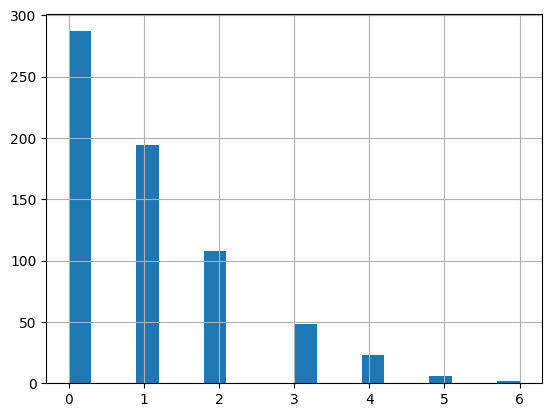

In [ ]:
overlap= []
num_rec = []
n = 20
for user in ratings.userId.unique():
    top_items = model.topN(user=user, n=n)
    user_movies = ratings.loc[(ratings.userId==user)].movieId
    valid_rec = set(top_items).intersection(set(user_movies)) # I can only measure by what was in the training data

    _ = len(set(ratings.loc[ratings.userId==user].sort_values(by='rating', ascending=False).head(n).movieId).intersection(set(valid_rec)))
    overlap.append(_)
    num_rec.append(len(valid_rec))

print('avg_perc_overlap:', np.array(overlap).mean() / np.array(num_rec).mean())
pd.Series(overlap).hist(bins=20)

Now Let's understand about another metric called **K-precision**

#### What is K-precision?

- K-Precision is a metric used to evaluate the quality of recommendations provided by recommendation systems.
- It assesses how many of the top-K recommended items are relevant to the user's preferences.
- A higher K-Precision value indicates better recommendation quality.

<center><img src="https://drive.google.com/uc?id=1DO8xfPMTT61g1lgFVpYd0DRqeQZuue-I"></center>


If I made K predictions, how many of those K were relevant?

avg: 0.7849889642782759


<Axes: >

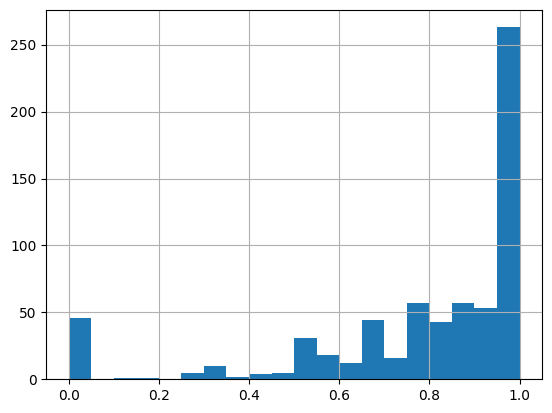

In [ ]:
overlap=[]
for user in ratings.userId.unique():
    recommendations = model.topN(user=user, n=100)
    user_movies = ratings.loc[(ratings.userId==user)].movieId
    valid_rec = set(recommendations).intersection(set(user_movies)) # I can only measure by what was in the training data
    relevant_items = ratings.loc[(ratings.userId==user) & (ratings.rating>=4)].movieId
    try:
        _ = len(set(recommendations).intersection(set(relevant_items))) / len(valid_rec)
    except:
        _ = 0
    overlap.append(_)

overlap = np.array(overlap)
print('avg:', overlap.mean())
pd.Series(overlap).hist(bins=20)

if I make, K predictions, how many relevant items was able to find?

avg: 0.21475637378786894


<Axes: >

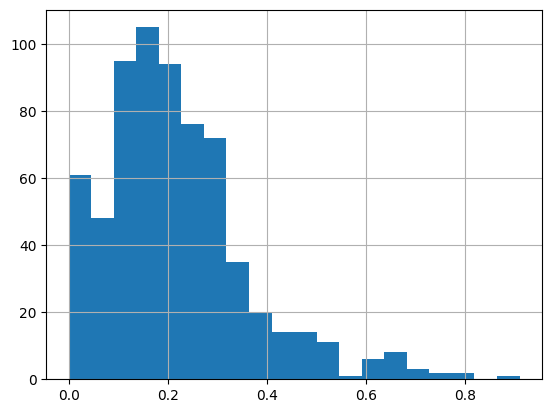

In [ ]:
overlap=[]
for user in ratings.userId.unique():
    recommendations = model.topN(user=user, n=100)
    user_movies = ratings.loc[(ratings.userId==user)].movieId
    valid_rec = set(recommendations).intersection(set(user_movies)) # I can only measure by what was in the training data
    relevant_items = ratings.loc[(ratings.userId==user) & (ratings.rating>=4)].movieId
    try:
        _ = len(set(recommendations).intersection(set(relevant_items))) / len(set(relevant_items))
    except:
        _ = 0
    overlap.append(_)

overlap = np.array(overlap)
print('avg:', overlap.mean())
pd.Series(overlap).hist(bins=20)


---


# 😊 **THANK YOU** 😊


---
